In [1]:
import numpy as np
from network import *
from simulation import *
from gen_data import *
import matplotlib.pyplot as plt
from optimizers import *
from learning_algorithms import *
from functions import *
from scipy.ndimage.filters import uniform_filter1d
%matplotlib notebook

In [2]:
### --- Define task and generate training and test data --- ###

task = Add_Task(5, 9, deterministic=True, tau_task=1)
N_train = 30000
N_test = 10000
data = task.gen_data(N_train, N_test)

In [3]:
### --- Initialize RNN object --- ###

n_in = task.n_in
n_hidden = 32
n_out = task.n_out

W_in  = np.random.normal(0, np.sqrt(1/(n_in)), (n_hidden, n_in))
W_rec = np.linalg.qr(np.random.normal(0, 1, (n_hidden, n_hidden)))[0]
W_out = np.random.normal(0, np.sqrt(1/(n_hidden)), (n_out, n_hidden))
W_FB = np.random.normal(0, np.sqrt(1/n_out), (n_out, n_hidden))

b_rec = np.zeros(n_hidden)
b_out = np.zeros(n_out)

alpha = 1

rnn = RNN(W_in, W_rec, W_out, b_rec, b_out,
          activation=tanh,
          alpha=alpha,
          output=softmax,
          loss=softmax_cross_entropy)

In [4]:
### --- Choose optimizer and learning algorithm --- ###

optimizer = Stochastic_Gradient_Descent(lr=0.03)
learn_alg = RTRL(rnn)

In [5]:
### --- Pick variables to track and run simulation --- ###

monitors = ['rnn.loss_']

sim = Simulation(rnn)
sim.run(data, learn_alg=learn_alg, optimizer=optimizer,
        monitors=monitors,
        verbose=True,
        report_accuracy=False,
        report_loss=True,
        checkpoint_interval=None)

Progress: 10.0% complete 
Time Elapsed: 1.4s 
Average loss: 0.4854424742539652 
Test loss: 0.4690229235713648 

Progress: 20.0% complete 
Time Elapsed: 3.4s 
Average loss: 0.46169086821364136 
Test loss: 0.46562523022408625 

Progress: 30.0% complete 
Time Elapsed: 5.5s 
Average loss: 0.46712080458043054 
Test loss: 0.4635280886083585 

Progress: 40.0% complete 
Time Elapsed: 7.6s 
Average loss: 0.4609444035369405 
Test loss: 0.46026836541071586 

Progress: 50.0% complete 
Time Elapsed: 9.6s 
Average loss: 0.4642608066140496 
Test loss: 0.45755852330169317 

Progress: 60.0% complete 
Time Elapsed: 11.7s 
Average loss: 0.4576712414034609 
Test loss: 0.4570458309842471 

Progress: 70.0% complete 
Time Elapsed: 13.7s 
Average loss: 0.4601663015250065 
Test loss: 0.45692515693017577 

Progress: 80.0% complete 
Time Elapsed: 15.8s 
Average loss: 0.45828417924193315 
Test loss: 0.45618265662900104 

Progress: 90.0% complete 
Time Elapsed: 17.8s 
Average loss: 0.46030445268769926 
Test loss: 

<IPython.core.display.Javascript object>


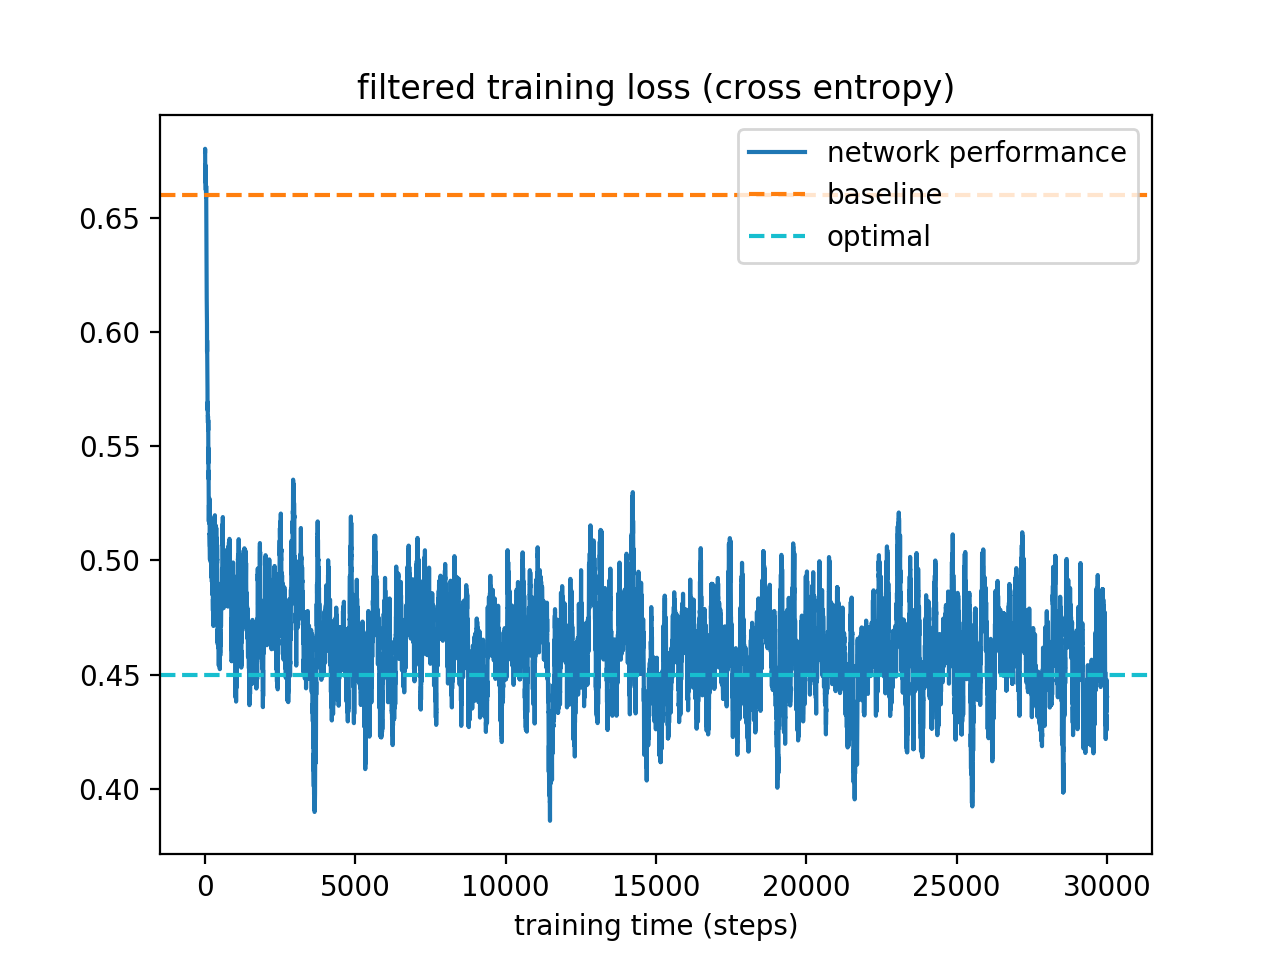

In [6]:
### --- Plot filtered training loss --- ###

plt.figure()
n_filter = 100
filtered_loss = uniform_filter1d(sim.mons['rnn.loss_'], n_filter)
plt.plot(filtered_loss)
plt.xlabel('training time (steps)')
plt.title('filtered training loss (cross entropy)')
plt.axhline(y=0.66, linestyle='--', color='C1')
plt.axhline(y=0.45, linestyle='--', color='C9')
plt.legend(['network performance', 'baseline', 'optimal'])

test_sim = Simulation(rnn)
test_sim.run(data,
              mode='test',
              monitors=['rnn.loss_', 'rnn.y_hat', 'rnn.a'],
              verbose=False)

<IPython.core.display.Javascript object>


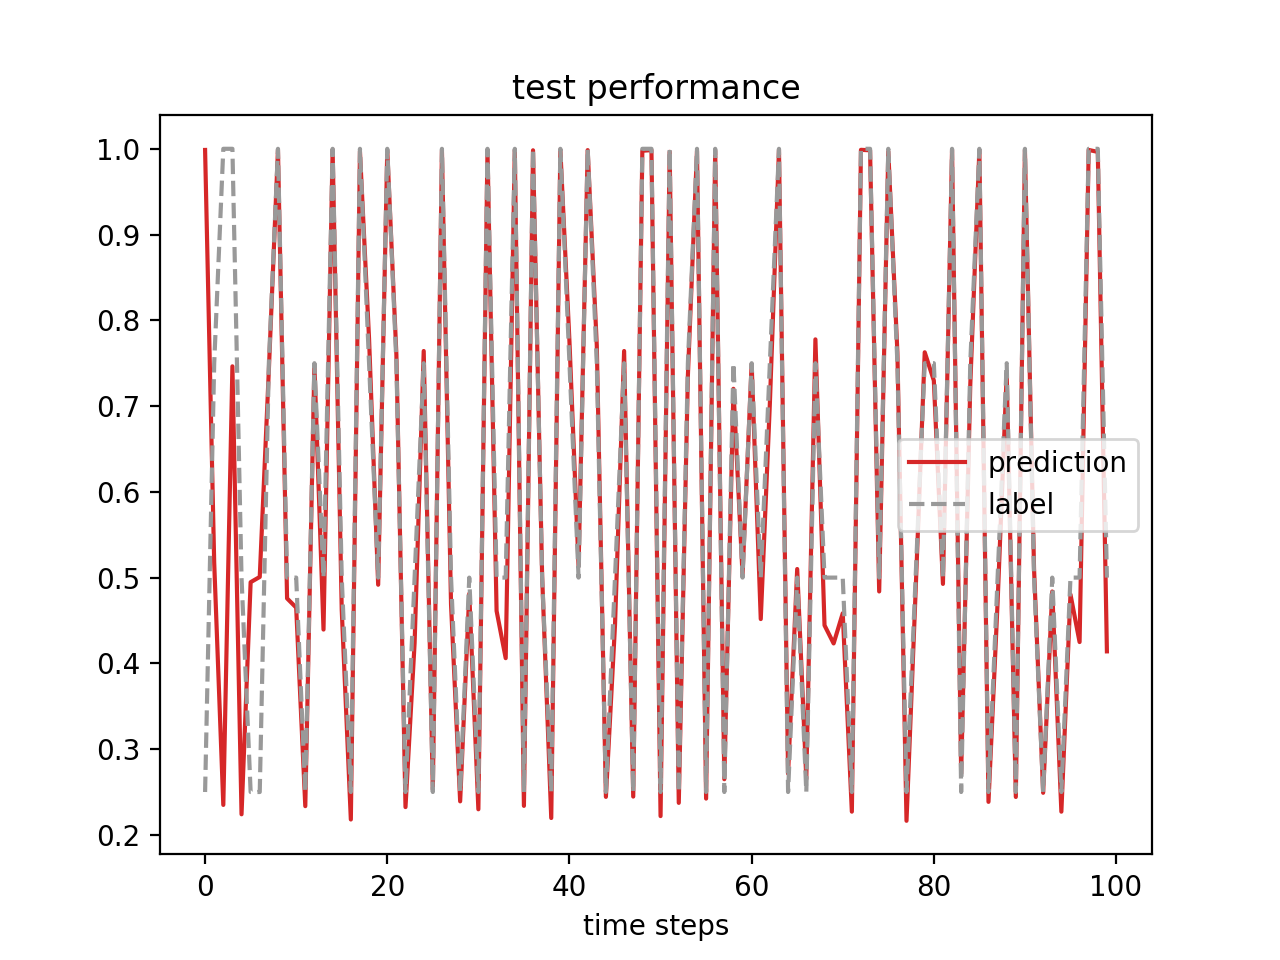

Text(0.5, 0, 'time steps')

In [7]:
### --- Plot predictions and labels during test run --- ###

plt.figure()
plt.plot(test_sim.mons['rnn.y_hat'][:100,0], color='C3')
plt.plot(data['test']['Y'][:100,0], '--', color=('0.6'))
plt.legend(['prediction', 'label'])
plt.title('test performance')
plt.xlabel('time steps')